In [1]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


(60000, 28, 28, 1)
[5 0 4 ... 5 6 8]


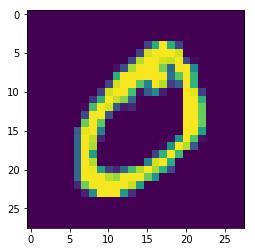

In [2]:
#Dataset preperation for basic mnist network

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data() 

# print(x_train.shape)
# print(len(x_train))
# print(x_train.shape)
# print(x_test.shape)
# print(len(x_test.shape))
image_size = 28


plt.imshow(x_train_mnist[1])

x_train_mnist = np.reshape(x_train_mnist, [-1, image_size, image_size, 1])#changing to (n, 28,28,1)
x_test_mnist = np.reshape(x_test_mnist, [-1, image_size, image_size, 1])

x_train_mnist = x_train_mnist.astype('float32') / 255
x_test_mnist = x_test_mnist.astype('float32') / 255

print((x_train_mnist.shape))

# print(np.unique(y_train))
# print(np.unique(y_test))#to print no. of classes

print(y_train_mnist)

from keras.utils import np_utils #onehotencoder

y_train_mnist = np_utils.to_categorical(y_train_mnist).astype('int32')#same functionality as onehotencoder
y_test_mnist = np_utils.to_categorical(y_test_mnist)

# for layer in model.layers:
#   print(layer.get_config(), layer.get_weights()) # to freeze the layer weight 

In [3]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
#functional keras model

inputLr = Input(shape = (28,28,1))

X1 = Conv2D(64,(3,3), activation = "relu")(inputLr)
X1 = MaxPooling2D(pool_size = (2,2))(X1)

X2 = Conv2D(32,(3,3), activation = "relu")(X1)
X2 = MaxPooling2D(pool_size = (2,2))(X2)

X3 = Conv2D(16,(3,3), activation = "relu")(X2)
X3 = Flatten()(X3)


X4 = Dense(128, activation  = "relu")(X3)
OutLr = Dense(10, activation  = "softmax")(X4) 

pretrained_model = Model(inputs = inputLr, outputs = OutLr)

pretrained_model.summary()

W0626 09:45:58.783288 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 09:45:58.808300 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 09:45:58.815330 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0626 09:45:58.838102 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [4]:
pretrained_model.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
pretrained_model.fit(x_train_mnist, y_train_mnist, epochs = 10,validation_data=(x_test_mnist, y_test_mnist), batch_size = 256)

W0626 09:45:58.933070 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 09:45:58.965619 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0626 09:45:59.081929 140366742640512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0626 09:45:59.169394 140366742640512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.4203 - acc: 0.8784 - val_loss: 0.1203 - val_acc: 0.9626
Epoch 2/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0976 - acc: 0.9697 - val_loss: 0.0774 - val_acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0675 - acc: 0.9787 - val_loss: 0.0569 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0521 - acc: 0.9841 - val_loss: 0.0565 - val_acc: 0.9807
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0440 - acc: 0.9862 - val_loss: 0.0449 - val_acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0403 - acc: 0.9872 - val_loss: 0.0397 - val_acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.0399 - val_ac

In [0]:
# for layer in pretrained_modelmodel.layers:
#     weights = layer.get_weights()
# print(weights)    

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.preprocessing import image
train_path = '/content/drive/My Drive/faces94/TLDB/TLDB/Shubham/Train/'
test_path = '/content/drive/My Drive/faces94/TLDB/TLDB/Shubham/Test/'

In [0]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva


result=[]
import numpy as np
import glob
files=(glob.glob(train_path+"/*.png")) #to list names of all the files inside given folder; i.e. relative path
n=len(files);
    
for indx in range(n):
        x=[imageprepare(files[indx])]#file path here
        newArr=[[0 for d in range(28)] for y in range(28)]
        k = 0
        for i in range(28):
            for j in range(28):
                newArr[i][j]=x[0][k]
                k=k+1
        result.append(newArr)
x_npa=np.asarray(result) # converting to NP ARRAY of size (n,28,28)
#     return x_npa
    



In [77]:
x_train_new = x_npa#our dataset
y_train_new = np.array([6,7,3,4,8,2,1,8,0,0,1,2,9,5,9])

#for svm model
y_train_new_for_svm=y_train_new
x_train_new = x_train_new.reshape([-1,28,28,1])

# model.predict(x_train_new)
pretrained_removed_model = Model(inputs = pretrained_model.input, outputs = pretrained_model.layers[6].output) #taking only convnet features by excluding two dense layers
x_train_features=pretrained_removed_model.predict(x_train_new)
pretrained_removed_model.summary()

print(x_train_features.shape)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
Total para

(15, 28, 28)


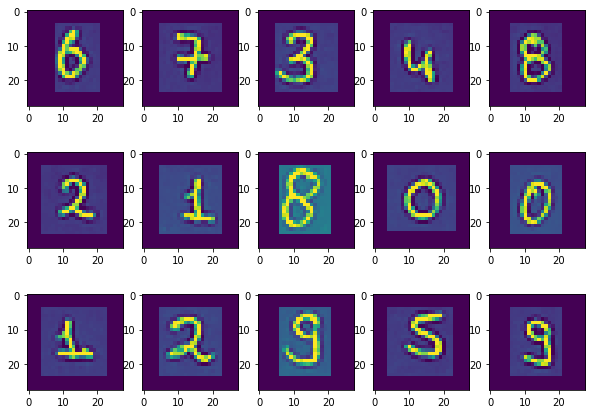

In [78]:
print(x_npa.shape)
plt.figure(figsize = (10, 10))

for i in range(15):
  plt.subplot(4,5,i+1)
  plt.imshow(x_npa[i])

In [0]:
y_train_new = np_utils.to_categorical(y_train_new).astype('int32')#same functionality as onehotencoder


In [80]:
#for our understanding we are sending our dataset as a test dataset to find how accurate my model is.
# y1 = x_train_new[0].reshape(-1,28,28,1)
y = pretrained_model.predict(x_train_new)
result1 = []

for i in range(15):
  result1.append(np.where(y[i] == np.amax(y[i])))
    
    
print(result1)

[(array([9]),), (array([3]),), (array([3]),), (array([4]),), (array([8]),), (array([3]),), (array([4]),), (array([8]),), (array([9]),), (array([0]),), (array([4]),), (array([3]),), (array([9]),), (array([5]),), (array([9]),)]


In [0]:
result=[]
import numpy as np
import glob
files=(glob.glob(test_path+"/*.png")) #to list names of all the files inside given folder; i.e. relative path
n=len(files);
    
for indx in range(n):
        x=[imageprepare(files[indx])]#file path here
        newArr=[[0 for d in range(28)] for y in range(28)]
        k = 0
        for i in range(28):
            for j in range(28):
                newArr[i][j]=x[0][k]
                k=k+1
        result.append(newArr)
x_npa1=np.asarray(result) # converting to NP ARRAY of size (n,28,28)


In [82]:
print(x_npa1.shape)
# plt.figure(figsize = (10, 10))
# for i in range(20):
#   plt.subplot(4,5,i+1)
#   plt.imshow(x_npa1[i])
             
x_test_new = x_npa1
x_test_new = x_test_new.reshape([-1,28,28,1])

y_test_new = np.array([2,5,0,9,5,7,7,9,8,3,3,0,4,6,4,2,1,8,6,1])
y_test_new_for_svm=y_test_new
print(y_test_new)

x_test_features =pretrained_removed_model.predict(x_test_new)
y_test_new = np_utils.to_categorical(y_test_new).astype('int32')

print(x_train_features.shape)

(20, 28, 28)
[2 5 0 9 5 7 7 9 8 3 3 0 4 6 4 2 1 8 6 1]
(15, 144)


In [83]:
#testing training only on our dataset

inputLr2 = Input(shape = (28,28,1))

X12 = Conv2D(64,(3,3), activation = "relu")(inputLr2)
X12 = MaxPooling2D(pool_size = (2,2))(X12)

X22 = Conv2D(32,(3,3), activation = "relu")(X12)
X22 = MaxPooling2D(pool_size = (2,2))(X22)

X32 = Conv2D(16,(3,3), activation = "relu")(X22)
X32 = Flatten()(X32)

X42 = Dense(128, activation  = "relu")(X32)
OutLr2 = Dense(10, activation  = "softmax")(X42) 

simple_convnet = Model(inputs = inputLr2, outputs = OutLr2)

simple_convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 16)          4624      
_________________________________________________________________
flatten_7 (Flatten)          (None, 144)               0         
__________

In [84]:
simple_convnet.compile(optimizer = "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
simple_convnet.fit(x_train_new, y_train_new, epochs = 10,validation_data=(x_test_new, y_test_new), batch_size = 5)

Train on 15 samples, validate on 20 samples
Epoch 1/10
15/15 [==============================] - 1s 48ms/step - loss: 2.3185 - acc: 0.0000e+00 - val_loss: 2.3019 - val_acc: 0.1000
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 2.2908 - acc: 0.1333 - val_loss: 2.3018 - val_acc: 0.1000
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 2.2761 - acc: 0.1333 - val_loss: 2.2997 - val_acc: 0.1000
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 2.2513 - acc: 0.1333 - val_loss: 2.2961 - val_acc: 0.1000
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 2.2205 - acc: 0.1333 - val_loss: 2.2932 - val_acc: 0.1000
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 2.1844 - acc: 0.1333 - val_loss: 2.2949 - val_acc: 0.1000
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 2.1360 - acc: 0.1333 - val_loss: 2.2959 - val_acc: 0.1000
Epoch 8/10
15/15 [=======================

In [85]:
from keras.models import Sequential


level2_dense_model = Sequential()
level2_dense_model.add(Dense(units = 64,input_shape = (144,),activation = "relu"))
level2_dense_model.add(Dense(units = 10, activation = "softmax"))
level2_dense_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                9280      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 9,930
Trainable params: 9,930
Non-trainable params: 0
_________________________________________________________________


In [86]:
level2_dense_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
level2_dense_model.fit(x_train_features,
                y_train_new,
             epochs=20, verbose = 2,
                validation_data=(x_test_features, y_test_new),
                batch_size=5
            )

Train on 15 samples, validate on 20 samples
Epoch 1/20
 - 1s - loss: 3.6996 - acc: 0.0667 - val_loss: 2.7344 - val_acc: 0.1500
Epoch 2/20
 - 0s - loss: 2.7962 - acc: 0.1333 - val_loss: 2.4542 - val_acc: 0.2000
Epoch 3/20
 - 0s - loss: 2.3667 - acc: 0.2000 - val_loss: 2.3276 - val_acc: 0.1000
Epoch 4/20
 - 0s - loss: 1.9963 - acc: 0.2000 - val_loss: 2.2435 - val_acc: 0.2000
Epoch 5/20
 - 0s - loss: 1.7713 - acc: 0.4000 - val_loss: 2.1654 - val_acc: 0.2500
Epoch 6/20
 - 0s - loss: 1.5771 - acc: 0.7333 - val_loss: 2.1040 - val_acc: 0.2500
Epoch 7/20
 - 0s - loss: 1.4087 - acc: 0.7333 - val_loss: 2.0520 - val_acc: 0.3500
Epoch 8/20
 - 0s - loss: 1.2519 - acc: 0.7333 - val_loss: 2.0006 - val_acc: 0.4000
Epoch 9/20
 - 0s - loss: 1.1187 - acc: 0.7333 - val_loss: 1.9495 - val_acc: 0.4000
Epoch 10/20
 - 0s - loss: 0.9710 - acc: 0.7333 - val_loss: 1.9057 - val_acc: 0.4500
Epoch 11/20
 - 0s - loss: 0.8607 - acc: 0.8667 - val_loss: 1.8717 - val_acc: 0.3500
Epoch 12/20
 - 0s - loss: 0.7368 - acc: 0

In [87]:
y1 = level2_dense_model.predict(x_test_features)
result1 = []

for i in range(20):
  result1.append(np.where(y1[i] == np.amax(y1[i])))
    
    
print(result1)

[(array([2]),), (array([8]),), (array([0]),), (array([9]),), (array([9]),), (array([7]),), (array([7]),), (array([7]),), (array([8]),), (array([9]),), (array([5]),), (array([0]),), (array([1]),), (array([6]),), (array([0]),), (array([2]),), (array([0]),), (array([8]),), (array([1]),), (array([0]),)]


In [88]:
#pretrained_model= convnet , and new_model=svm
from sklearn.svm import SVC
level2_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
print(x_train_features.shape)

level2_svm_classifier.fit(x_train_features, y_train_new_for_svm)

(15, 144)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_by_svm=level2_svm_classifier.predict(x_test_features)
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test_new_for_svm,y_pred_by_svm)

In [90]:
print(cn)

[[2 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 1]]


In [91]:
from sklearn.metrics import accuracy_score

# get the accuracy
print(accuracy_score(y_test_new_for_svm, y_pred_by_svm))

y_train_pred_by_svm=level2_svm_classifier.predict(x_train_features)

print(accuracy_score(y_train_new_for_svm, y_train_pred_by_svm))

0.5
0.8666666666666667
